#  Mushroom Classification Project
   In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

- Exploratory Data Analysis(EDA)
       Exploratory data analysis, like any other machine learning process, is experimental. It doesn't have any structure, but it is important to understand the data we are working with.
       
- Some of the things we might do:

     Find the datatype of each column.

     Check the data for missing data.

     Visualization of Data.

     Plotting the relation of the feature columns and the target column.

In [1]:
#libraries
import pandas as pd # data processing
import numpy as np # linear algebra

#ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt 

#feature engineering
from sklearn import preprocessing

# data transformation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

# for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import tree
import pickle


In [2]:
# Loading data
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# EDA

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [3]:
df.shape

(8124, 23)

dataset has 8124 rows and 23 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

 After checking the data,No Missing values and datatype also identified accuretly
 we know the following about the features:

They are all categorical attributes (object).

They have repetitive values.

They have several categories.

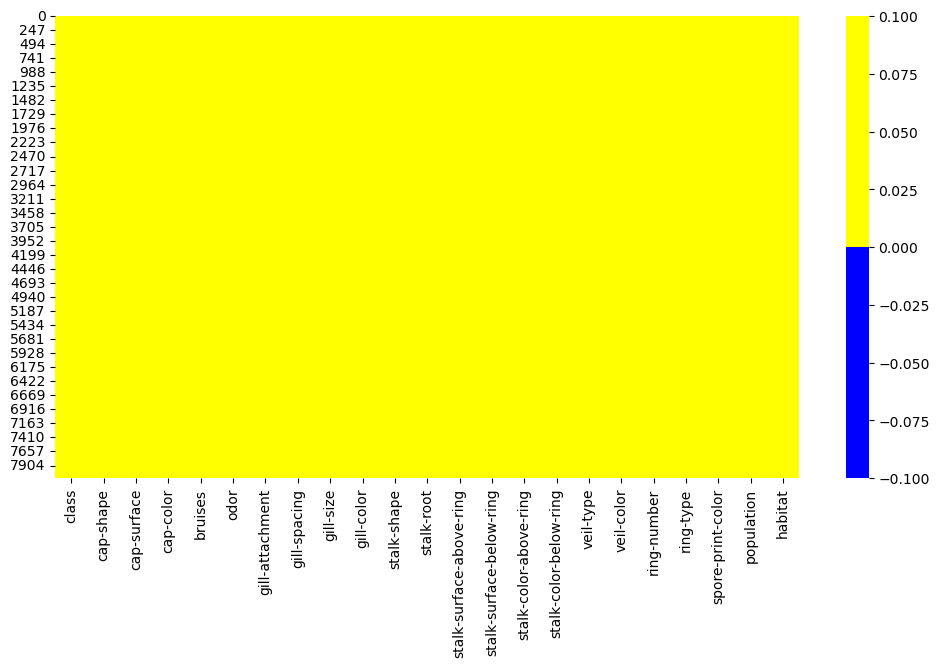

In [5]:
# Plot the heatmap to find more about Missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap=sns.color_palette(['blue','yellow']))
plt.show();

Looks like we don't have any null values. But plots sometimes deceive us, numbers don't. Let's check with the numbers

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no missing data. This is very good news, as missing data reduces the quality of our dataset.

In [7]:
# checking duplicate entries
df.duplicated().sum()

0

dataset has zero duplicate entry

In [8]:
pd.set_option('display.max_columns',None) #to display all columns
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


As all are categorical columns,describe fuctions calculate only count,unique,top and freq measures. Let's go ahead and check further.

# Data Visualization

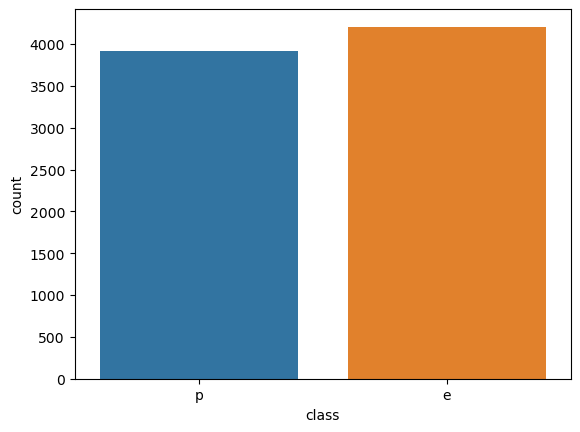

In [9]:
# for Target column
sns.countplot(x ='class', data = df)
plt.show();

Target column is not imbalanced,Distribution for 2 classes are approximatly equal.So their is no chance for machine to be biased for one class.

## Univarient plot

In [10]:
# checking unique category in each column of dataset
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [11]:
#checking count of each categories for every columns
sub_cat = df.columns.to_list()
print("Value Distribution:\n")
for col in sub_cat:
    print(col,"\n",df[col].value_counts(),"\n")    

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 

cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 

odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 

gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 

gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 

gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 

gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 

stalk-shape 
 t    4608
e  

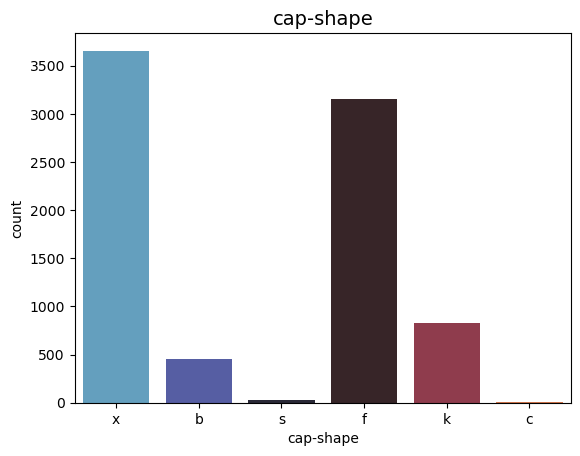

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


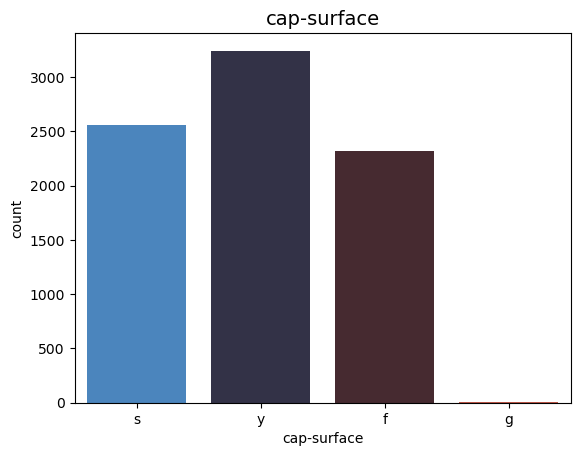

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


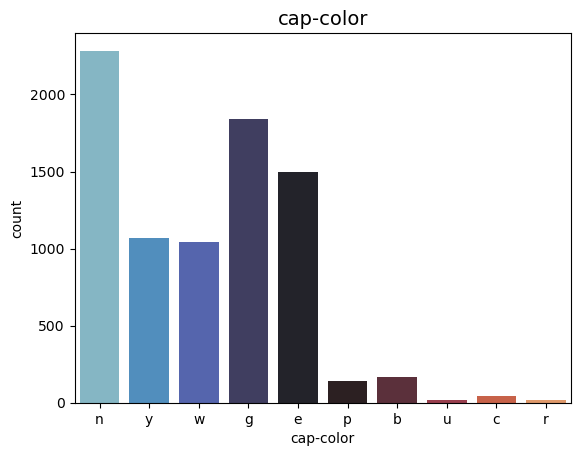

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


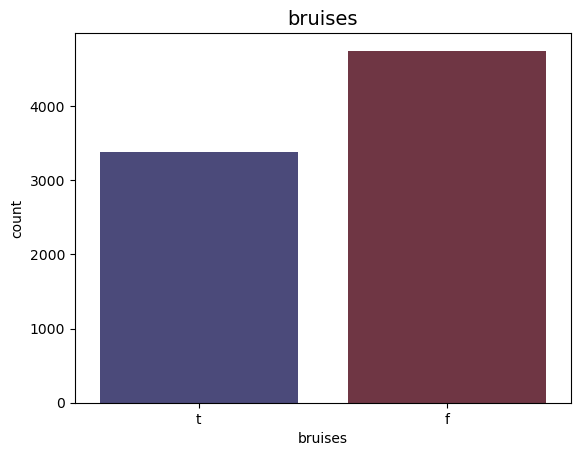

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


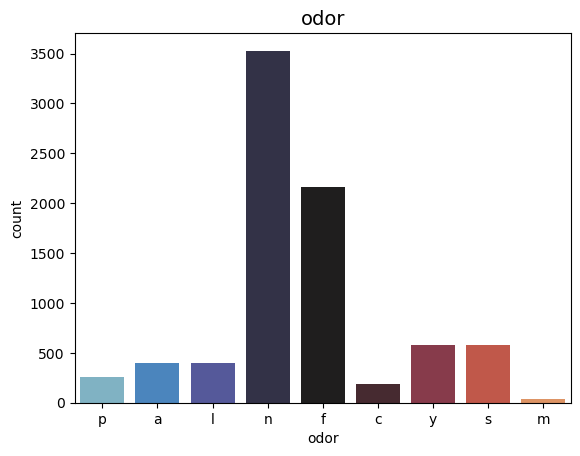

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


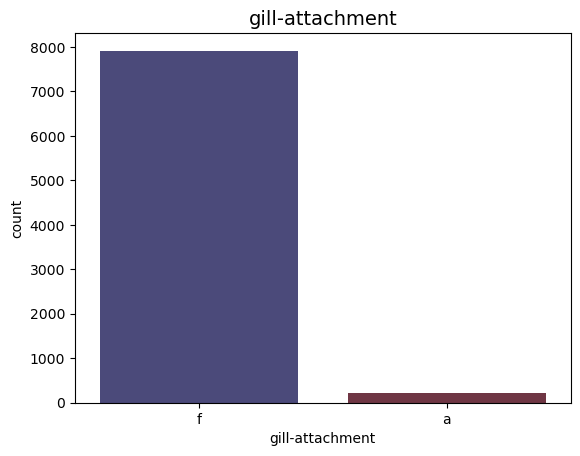

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


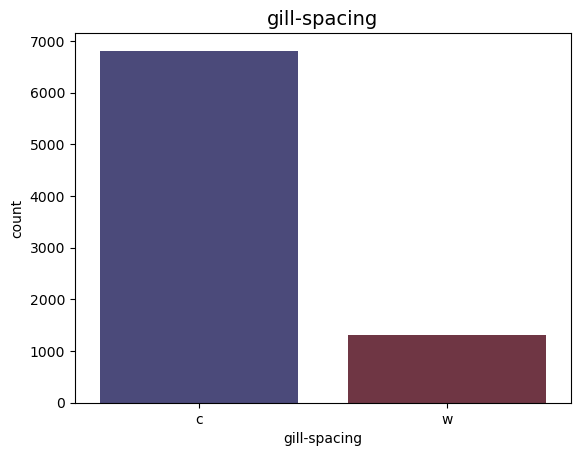

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


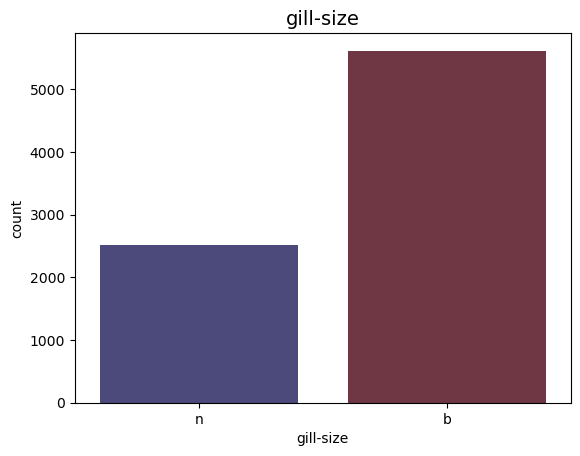

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


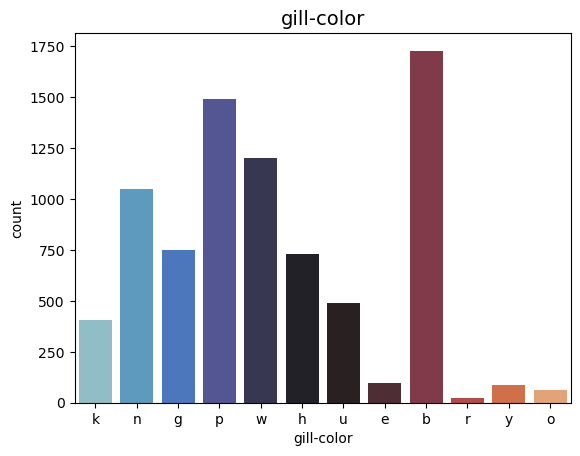

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


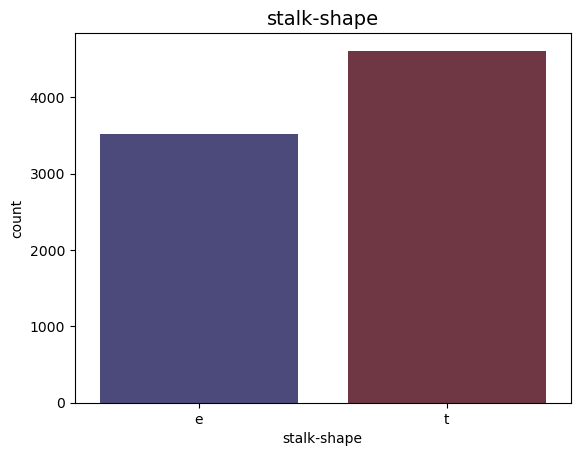

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


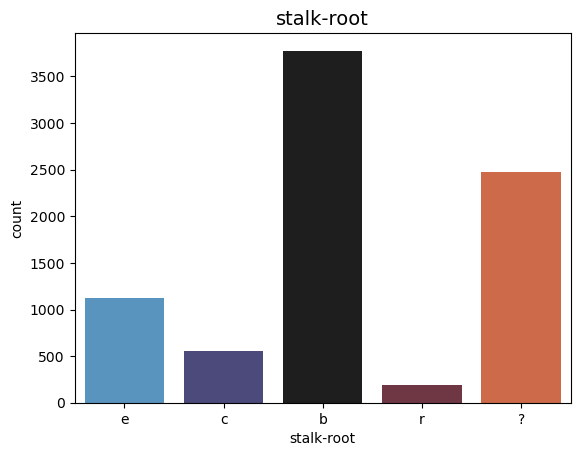

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


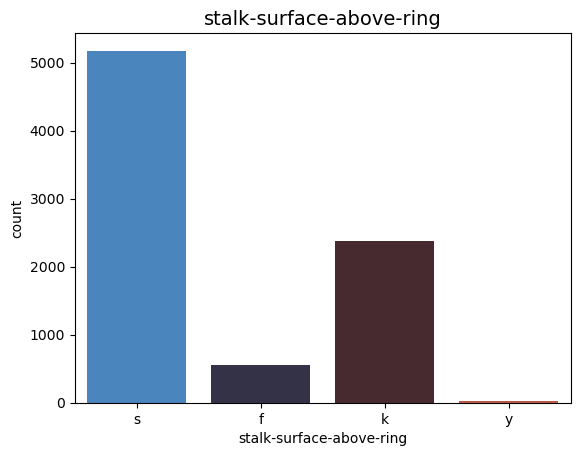

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


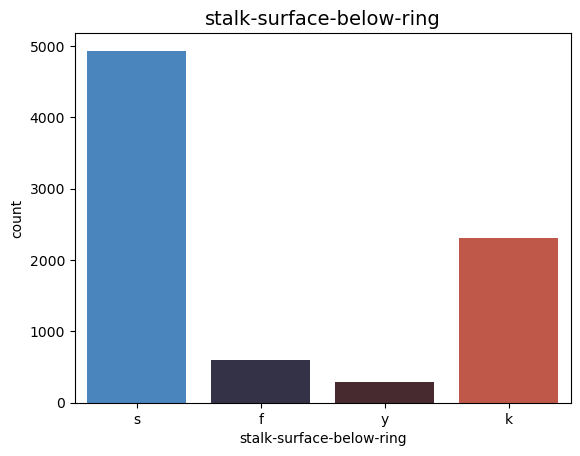

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


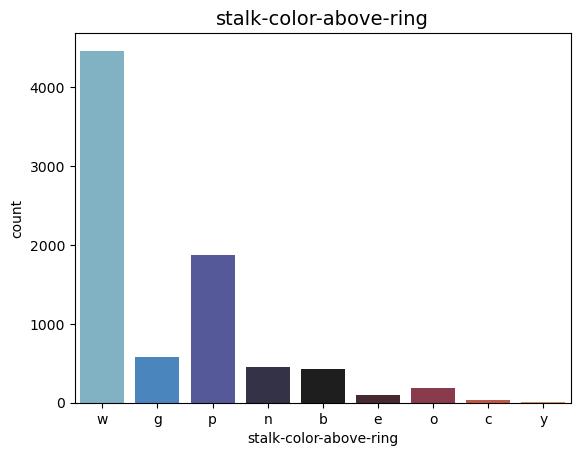

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


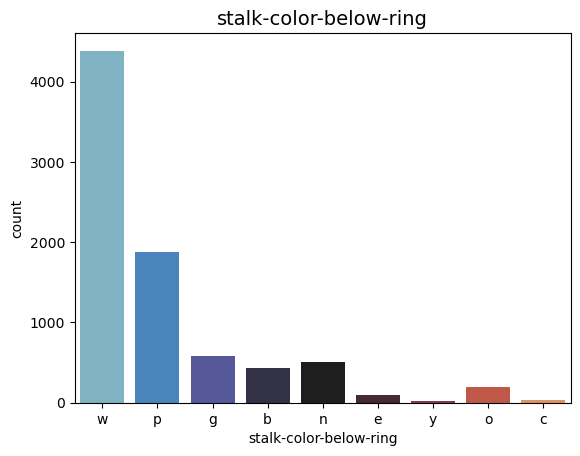

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


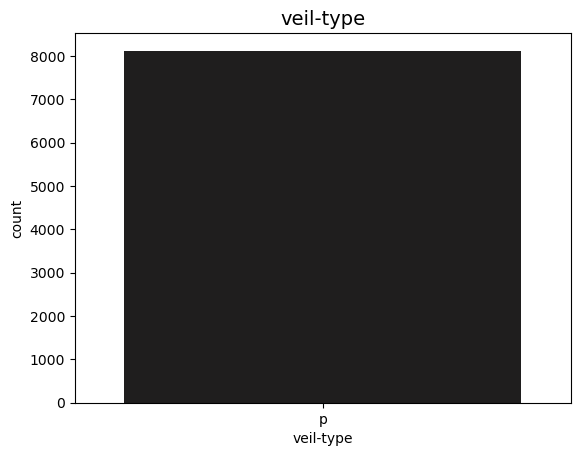

% of total:
p    100.0
Name: veil-type, dtype: float64


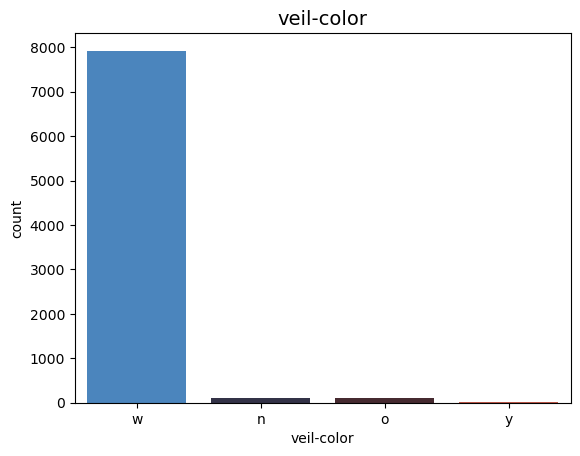

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


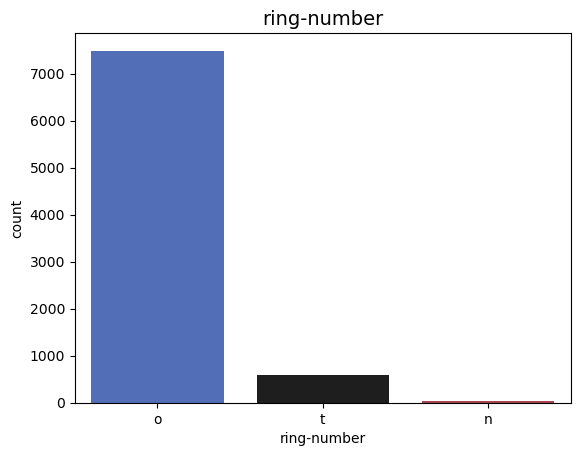

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


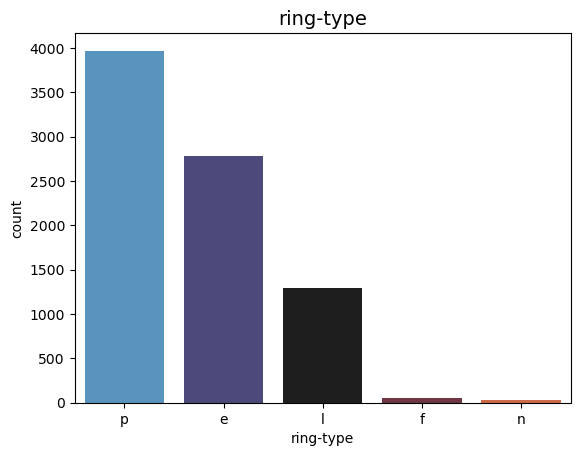

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


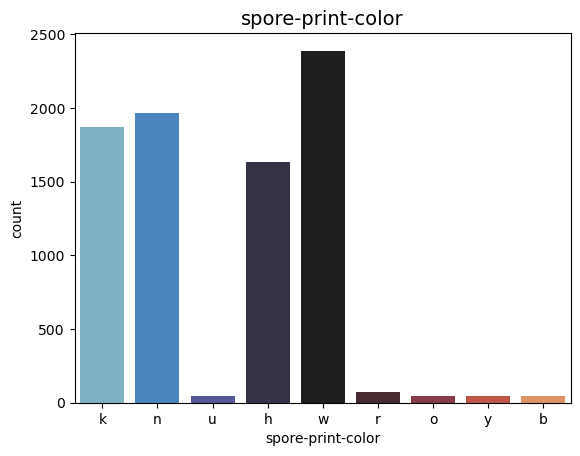

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


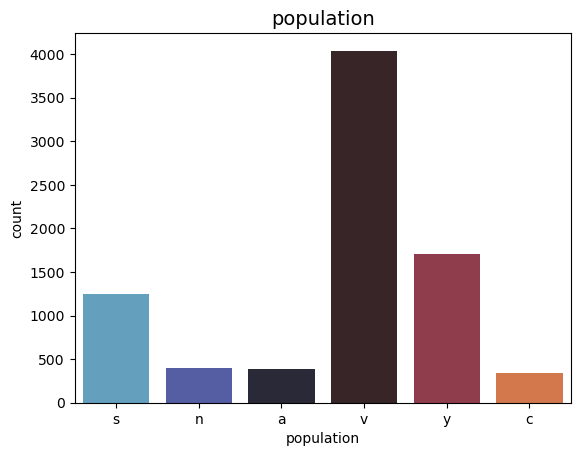

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


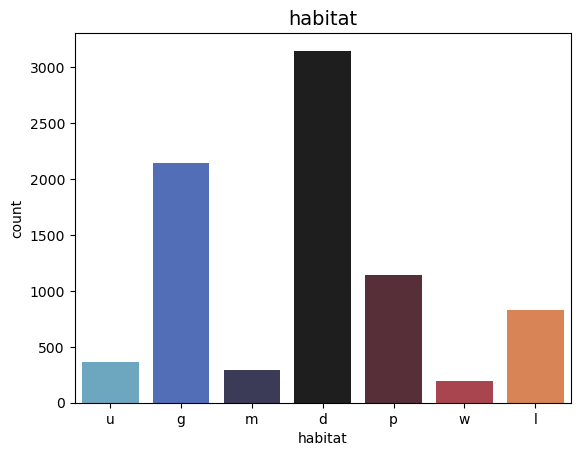

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [12]:
# visualization with their % value
for col in sub_cat[1:]:
    sns.countplot(x=col , data=df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show();
    
    print("% of total:")
    print(round((df[col].value_counts()/df.shape[0]),4)*100)

Most of the mushrooms in our dataset have a convex or a flat cap.

Most frequent cap surface is scaly.
 
Over half of the mushrooms in our dataset have a brown, red & gray cap color.

count of mushroom with no bruised is high as compared to mushroon with bruised.

Most frequent scents are either no smell or a foul smell.

*Almost our entire data has free gill attachment.so this column is pretty much useless in our analysis.

Most of the mushrooms in our dataset have a close gill spacing so it has little to no impact in our analysis.

Most of the mushrooms in our dataset have a broad gill sizes as compared to narrow.

Over half of the mushrooms in our dataset have a buff ,pink  or a white gill color.

Most of the mushrooms in our dataset have a tapering others are enlarging.

Most frequent stalk roots are bulbous.

Most frequent stalk surface above ring are either smooth or silky.

*Most frequent stalk surface below ring are either smooth or silky next to no difference from stalk-surface-above-ring.

*All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.

*Almost all of the mushroom's veil color are white so this column is pretty much usless in our analysis.

*Almost all of the mushroom's ring number amount are one, so this column is pretty much usless in our analysis.

Most of the mushrooms in our dataset have a pendant (48.84%),evanescent (34.17%) or a large (15.95%) ring type.

Most frequent colors are white,brown,black and chocolate, the other colors are insignificant.

Most frequent populations are either several or solitary.

Most frequent habitats are either woods or grasses.









## Multivarient Plot
     Ploting visual of features with two class edible and posionous mushrooms seperatly.

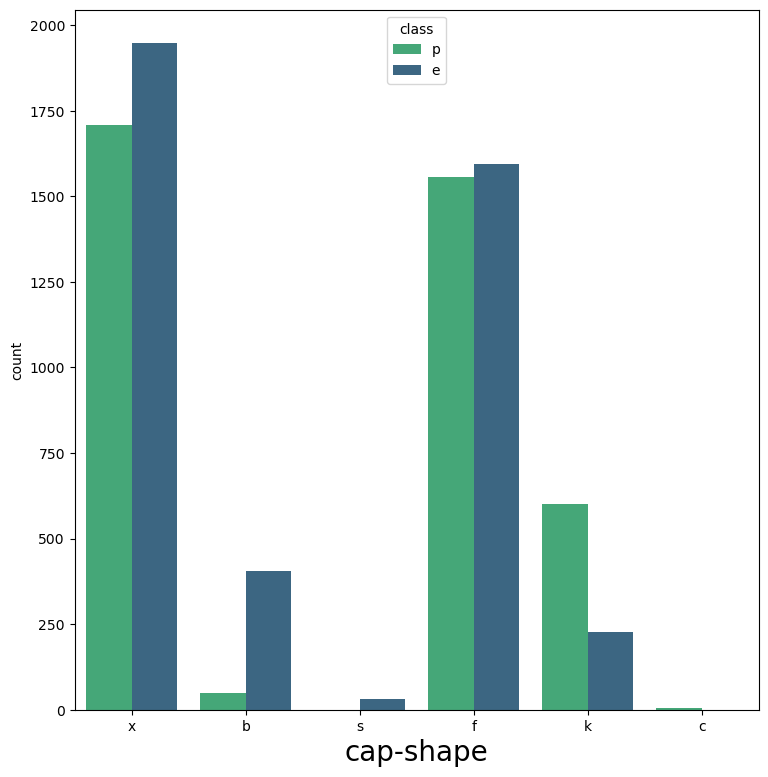

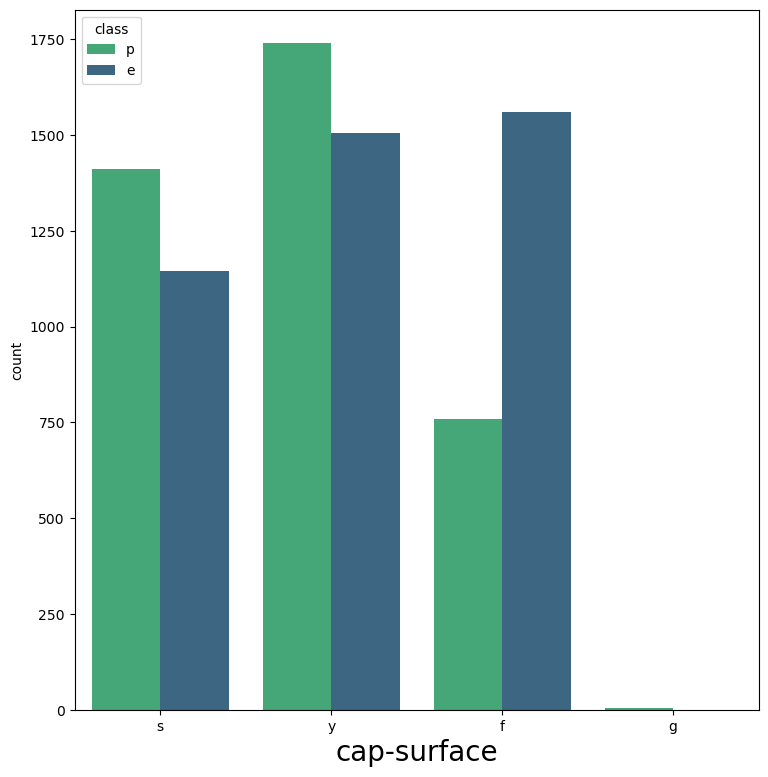

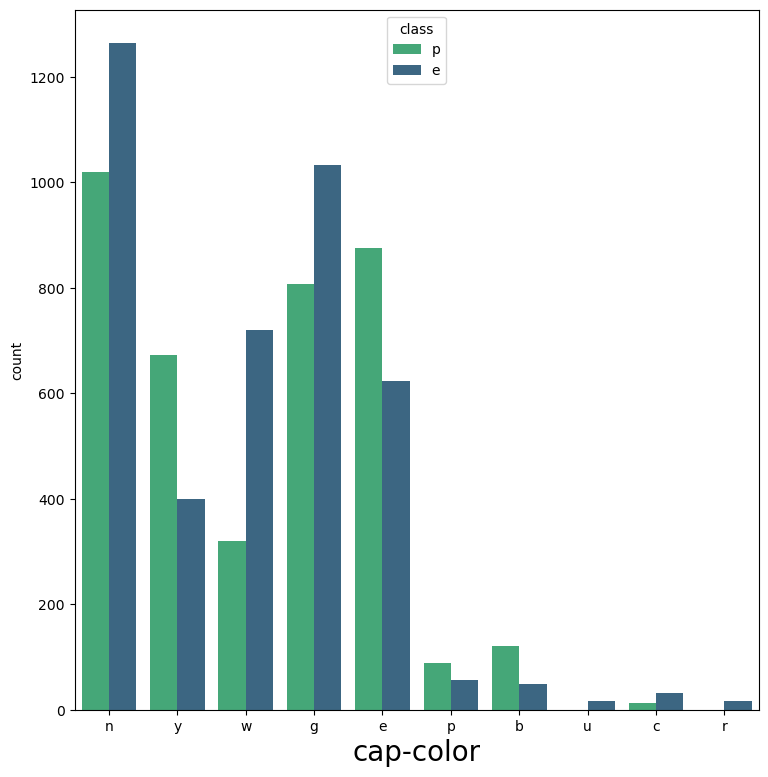

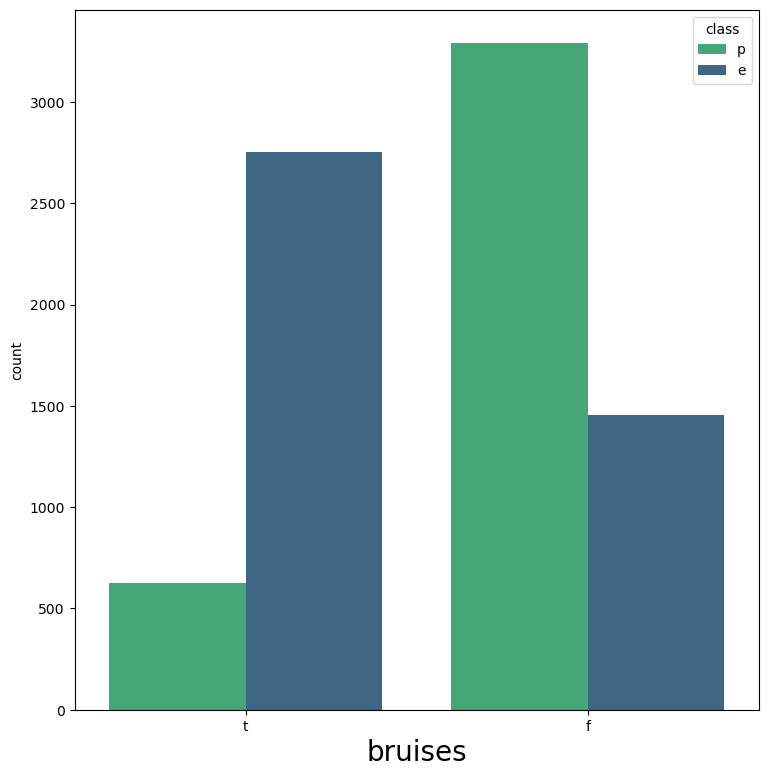

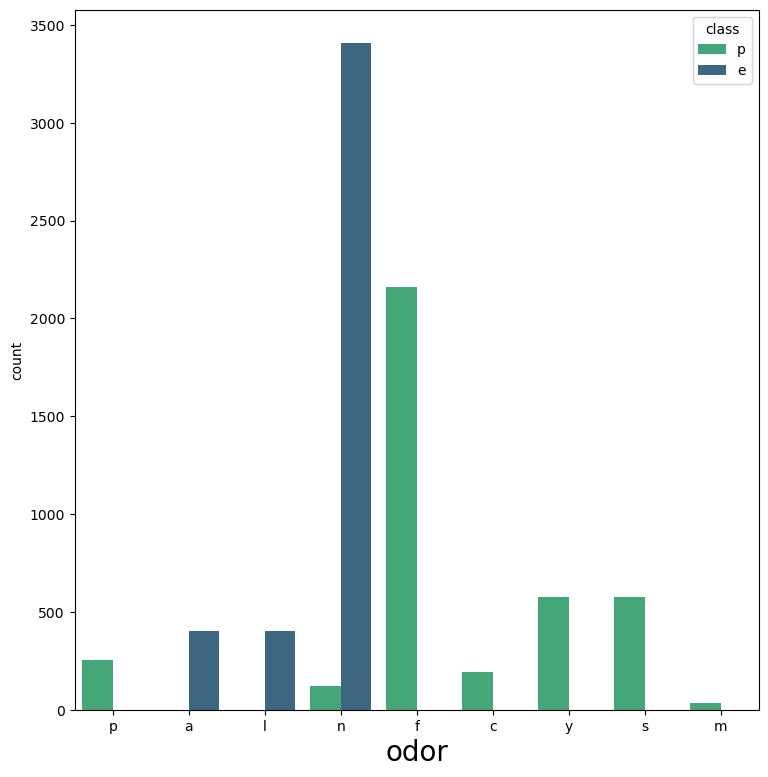

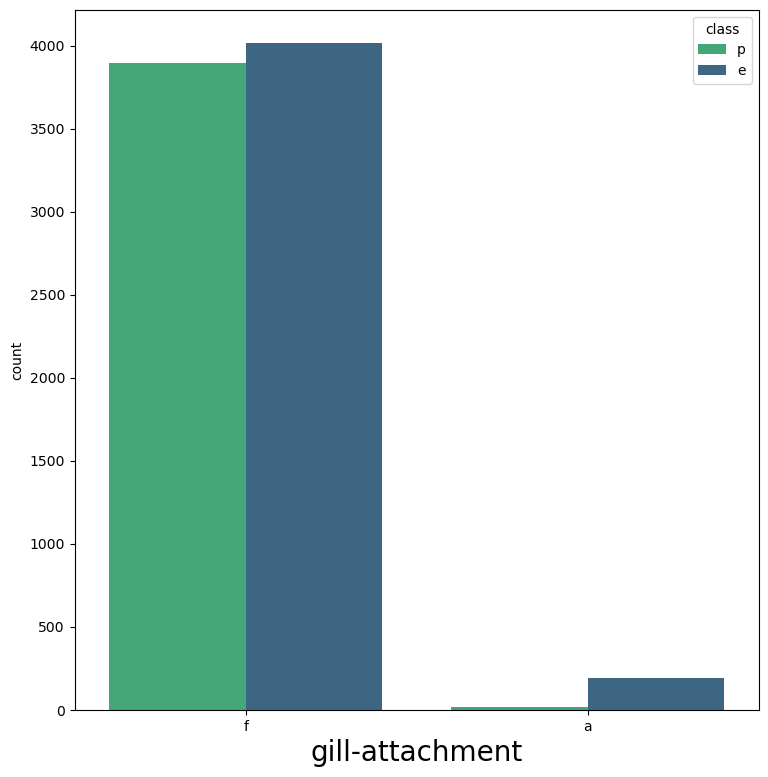

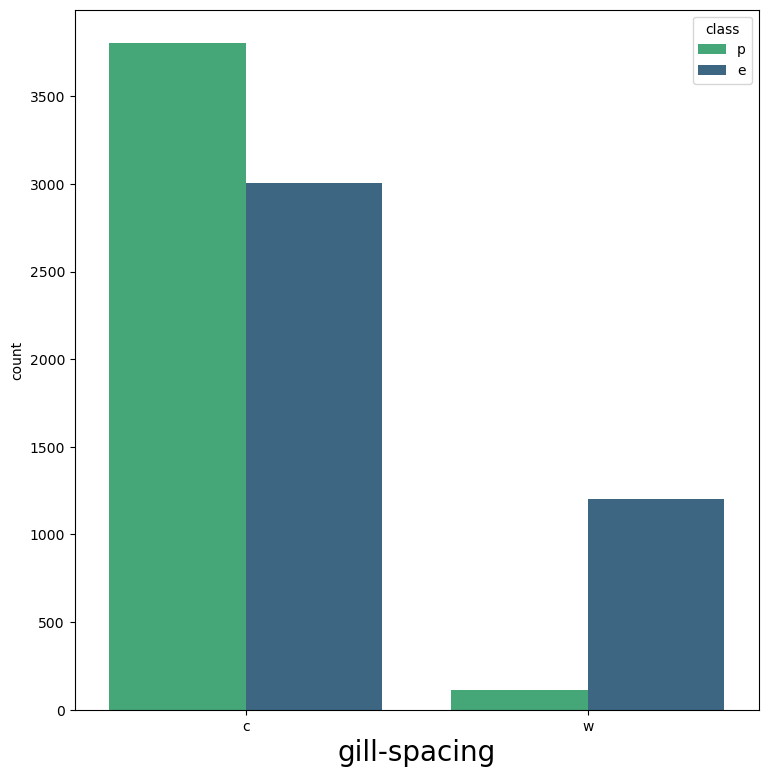

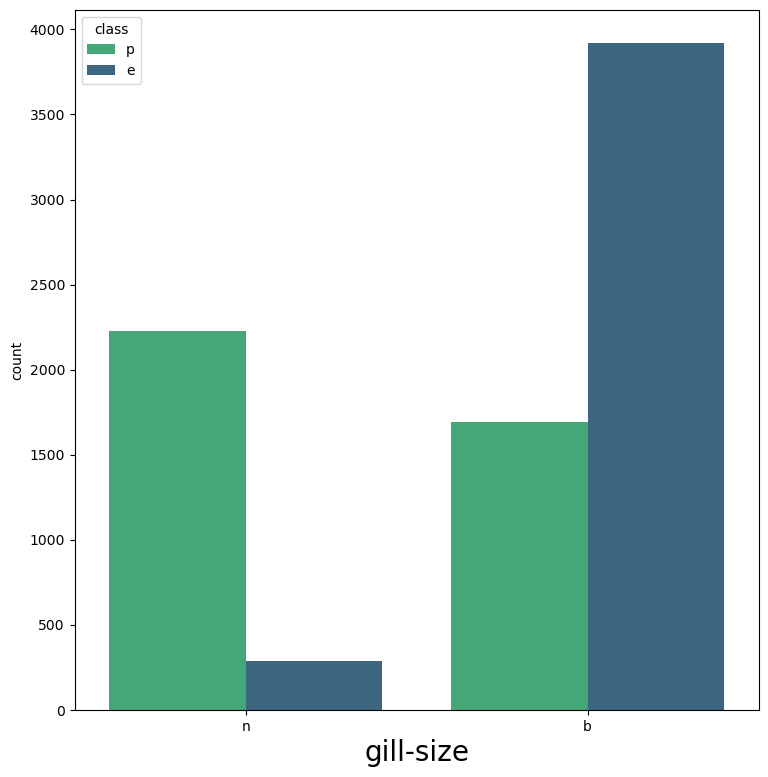

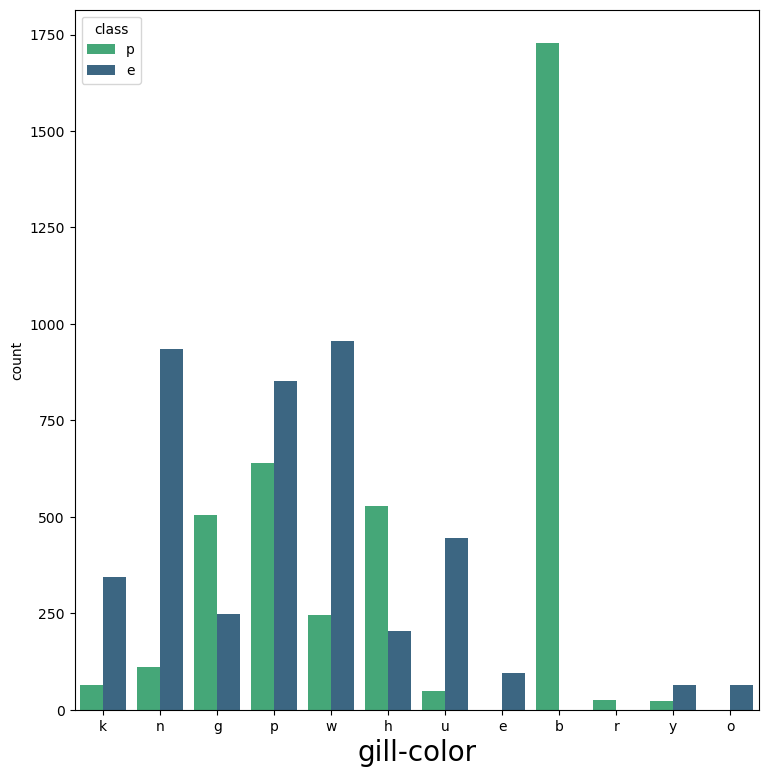

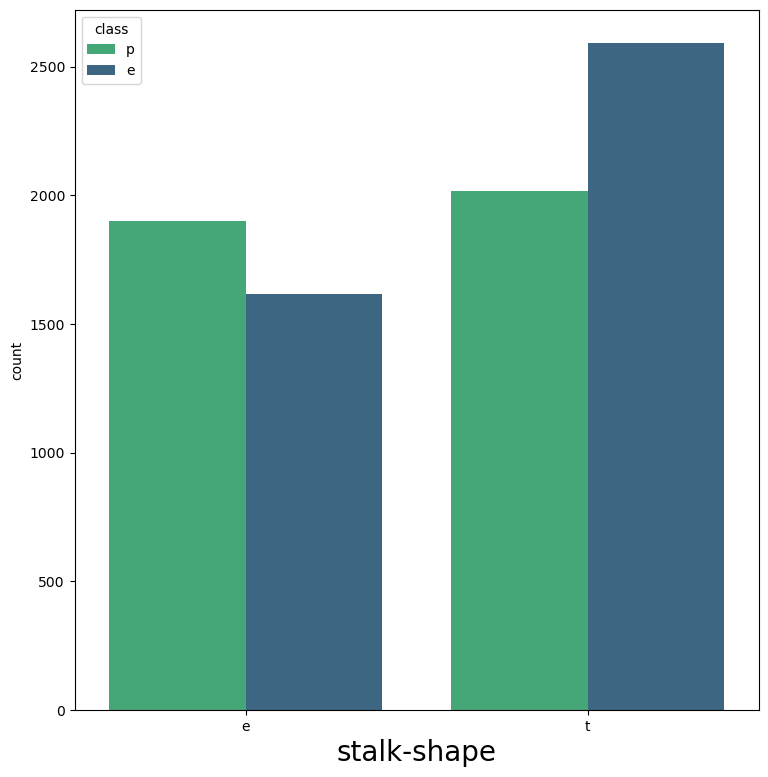

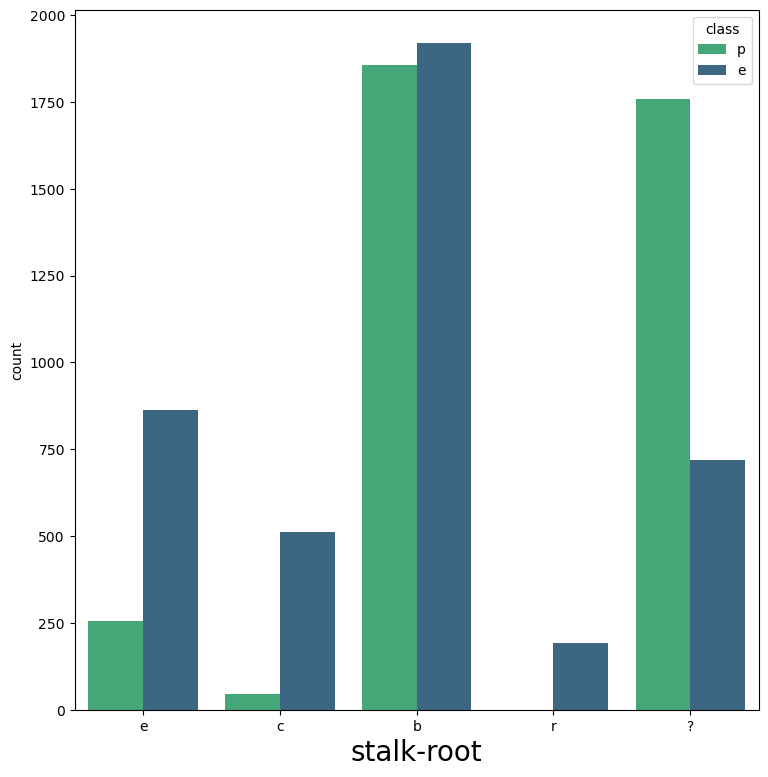

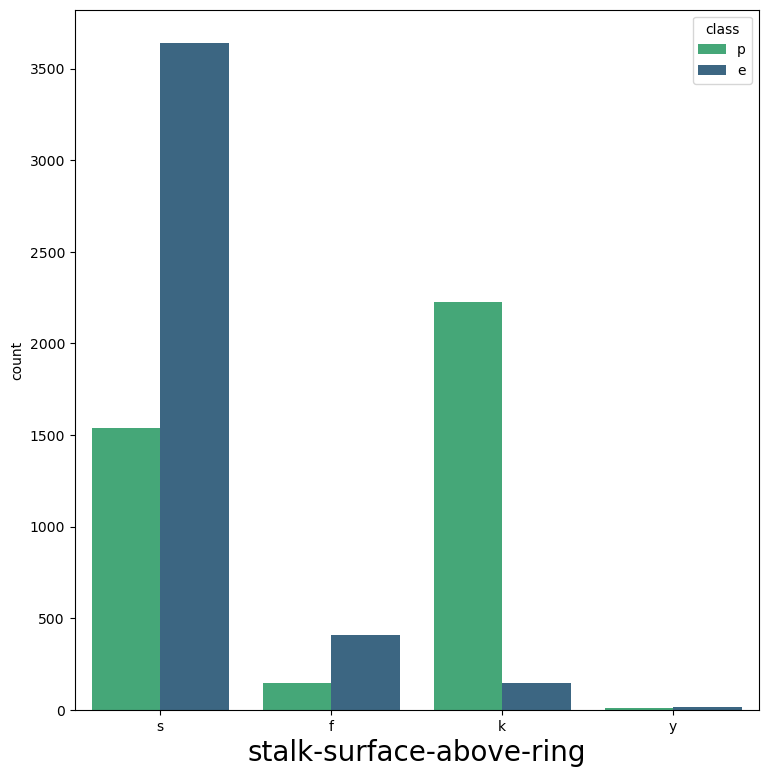

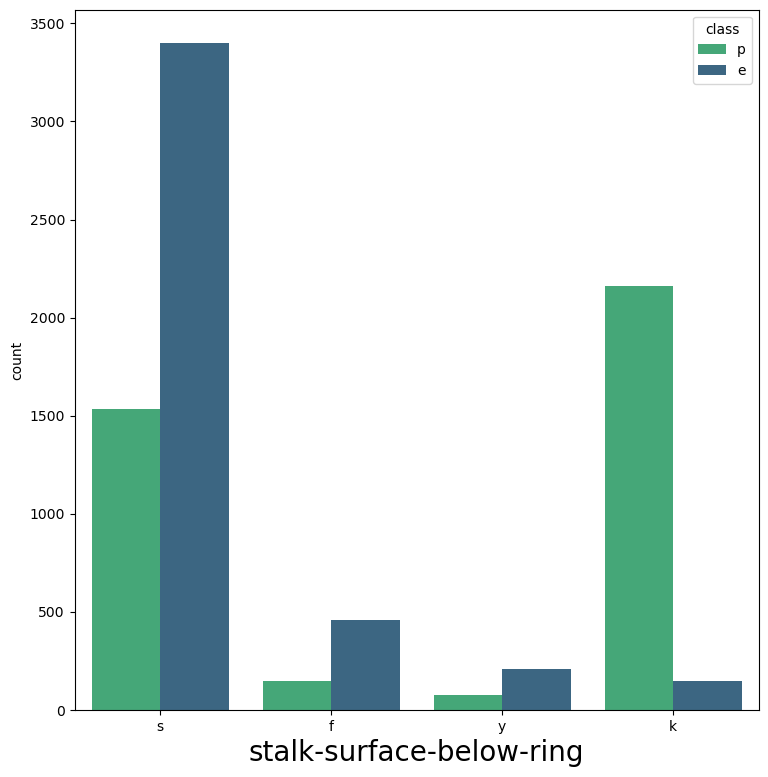

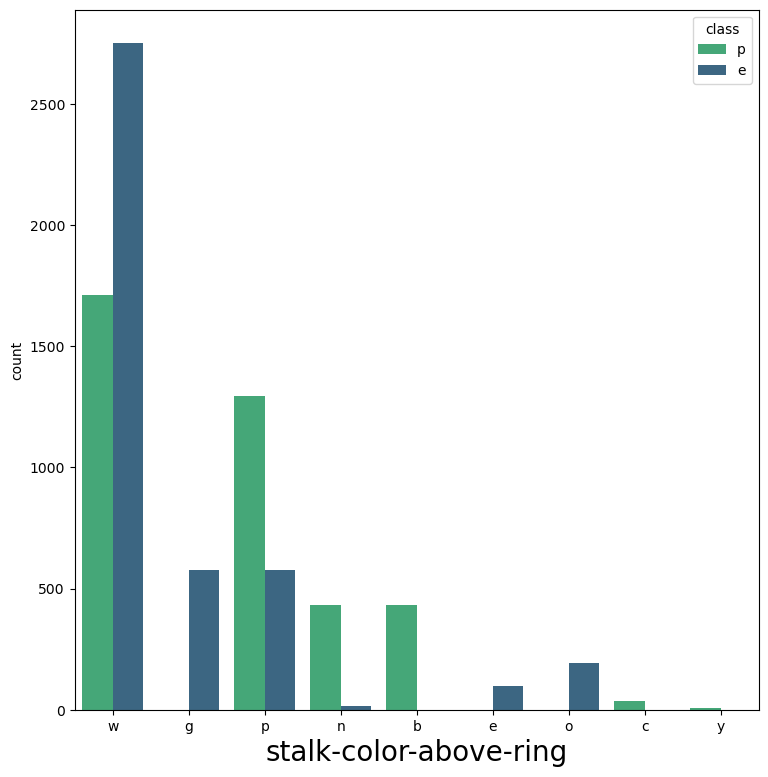

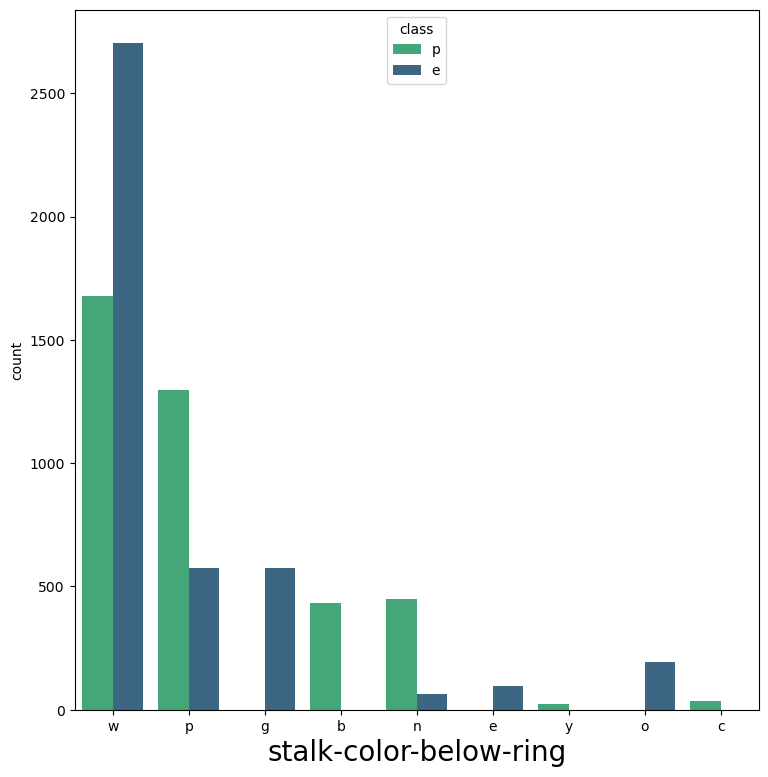

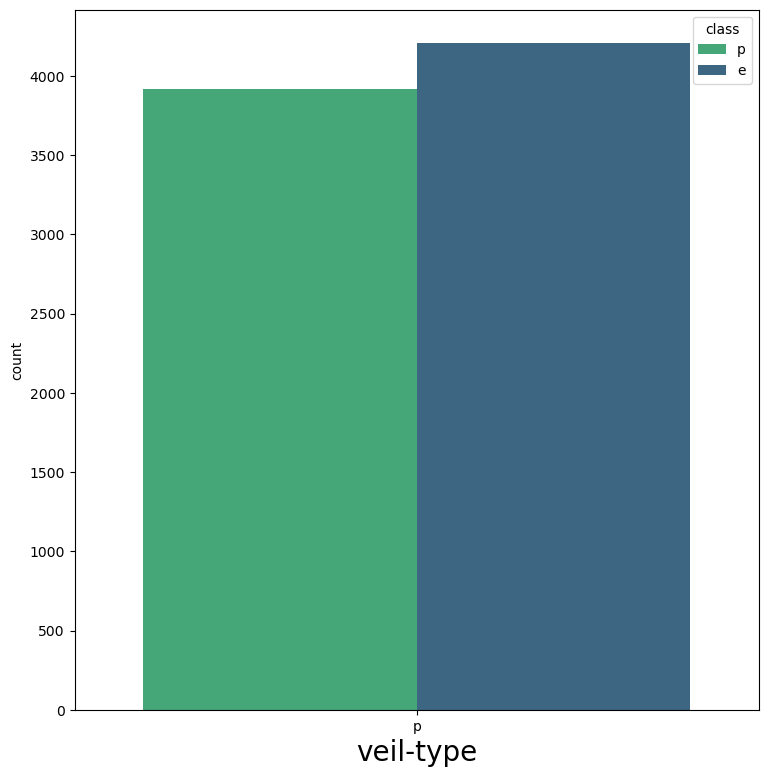

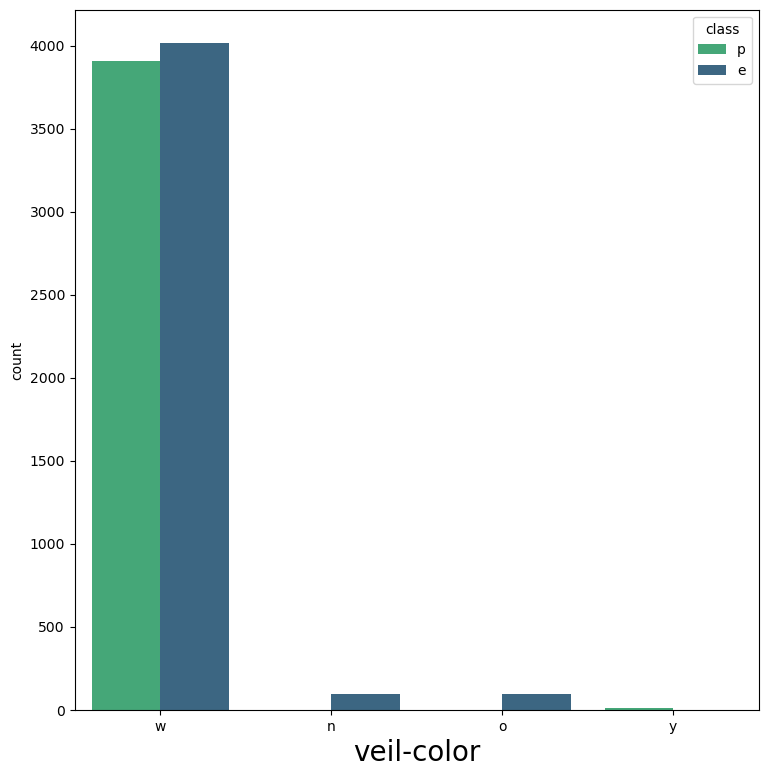

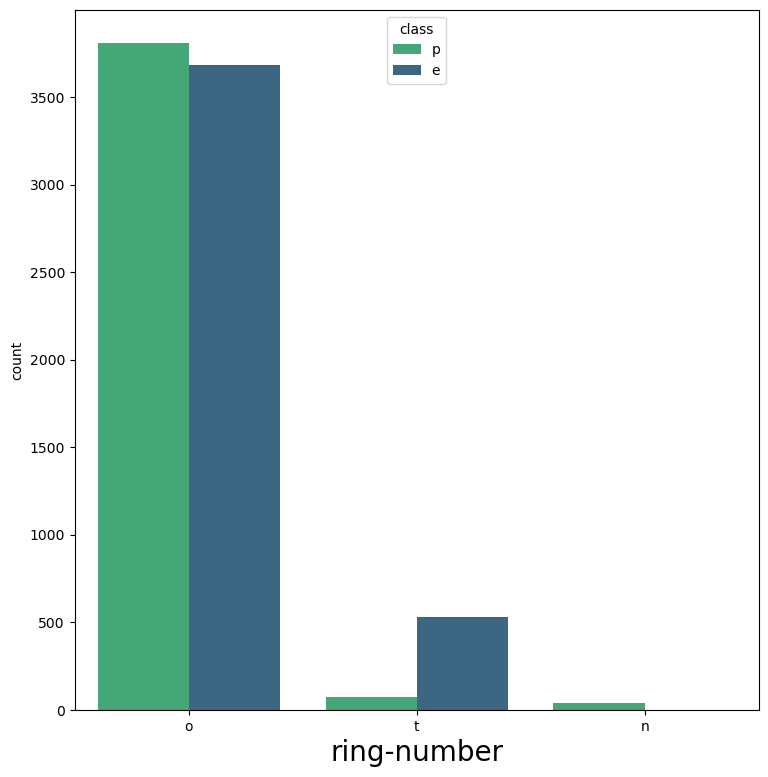

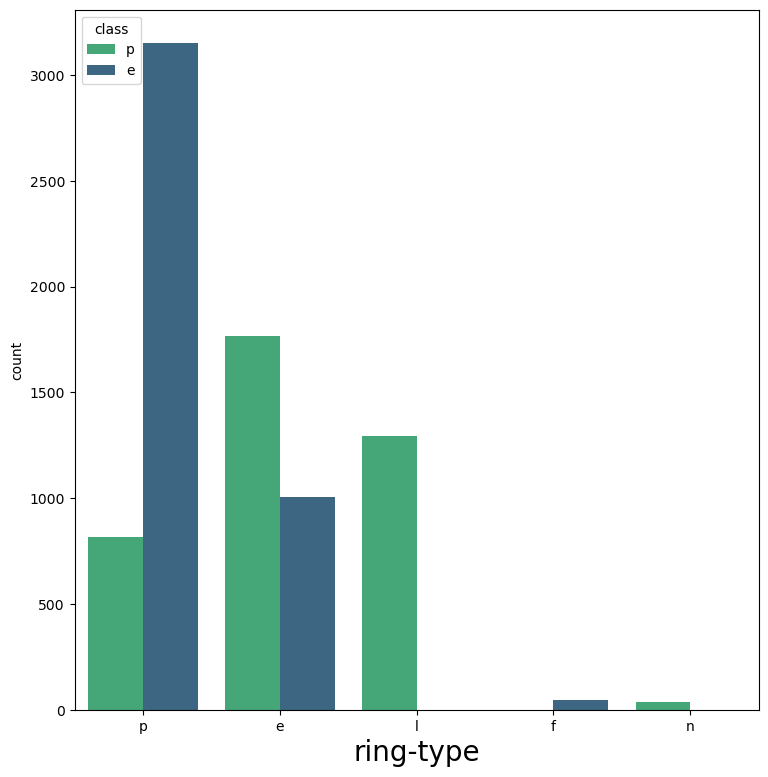

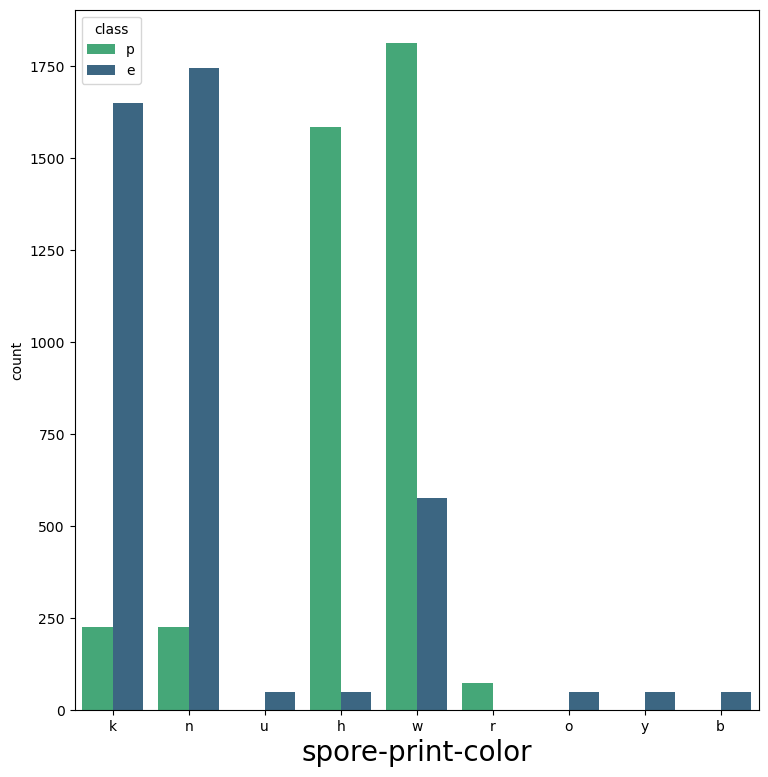

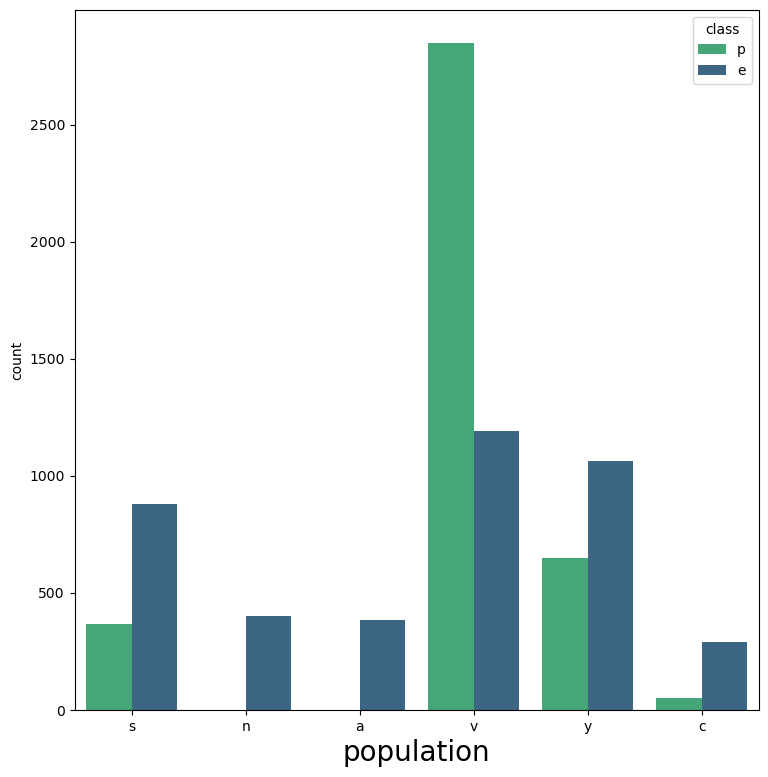

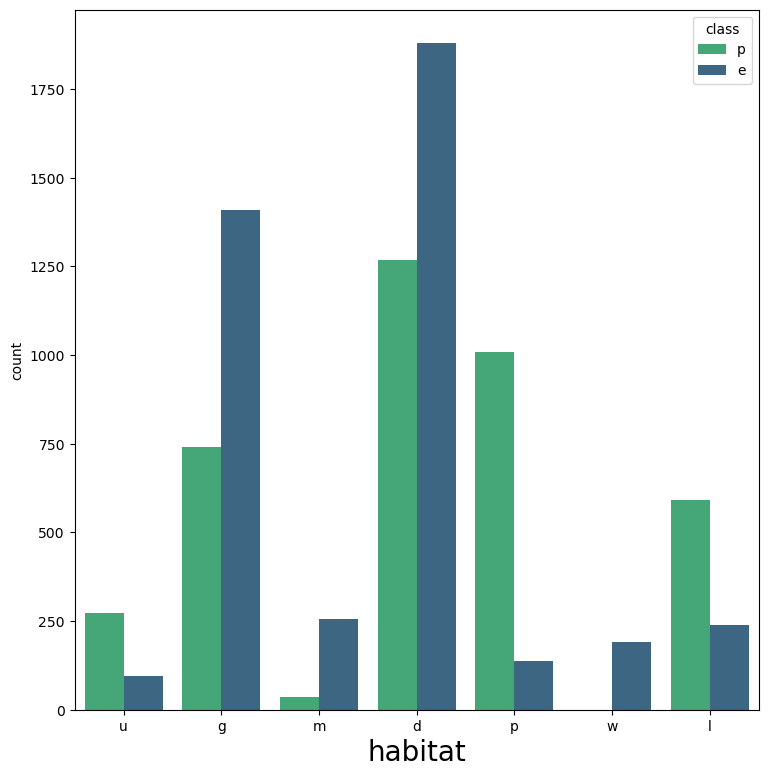

In [13]:
for col in sub_cat[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)

Most of the knobbed mushrooms in our dataset are poisonous.

Most fibrous cap surface are edible.

Most white cap colored mushrooms are edible while most yellow cap colored mushrooms are poisonous.

Bruised mushrooms are usually edible while unbruised ones are usually the oppisite.

No smell mushrooms are mostly edible by a wide margin while all foul smell mushrooms are poisonous.

The attached gills are almost always edible.

The crowded gills are almost always edible.

The narrow gill sized mushrooms are almost always poisonous.

The buff gill colored mushrooms are always poisonous.

stalk shape has insignificant difference betwwen each value in terms of poisonous or edible.

Mushrooms with missing data of stalk roots are usually poisonous.

The silky mushrooms with stalk surface above ring & stalk surface above ring are usually poisonous, smooth are usually edible..

The white stalk colored mushrooms are usually edible, pink ones are mostly poisonous.

All veil type of the mushroom's are partial.

Almost all of the mushroom's veil color are white.

Almost all of the mushroom's ring number amount are one.

The pendant ring typed mushrooms are mostly edible,evanescent are mostly poisonous and large ring types are all poisonous.

The brown and black spore print color ones are almost entirely edible while white and chocolate (20.09%) are mostly poisonous.

Mushrooms with a several population are mostly poisonous.

The woods or grasses grown mushrooms are mostly edible.


# Feature Engineering

- From the above analysis,following columns are not needed so we will drop them: gill-attachment, stalk-surface-below-ring, stalk-color-below-ring, veil-type, veil-color, ring-number

In [14]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
# Droppping insignificant columns
data=df.drop(['gill-attachment','ring-number','stalk-surface-below-ring','stalk-color-below-ring','veil-type','veil-color'],axis=1)
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-color-above-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [16]:
data.shape

(8124, 17)

In [17]:
# Renaming Column names
data.rename(columns = {'cap-shape':'cap_shape','cap-surface':'cap_surface',
                       'cap-color':'cap_color','gill-spacing':'gill_spacing',
                       'gill-size':'gill_size','gill-color':'gill_color',
                       'stalk-shape':'stalk_shape','stalk-root':'stalk_root',
                       'stalk-surface-above-ring':'stalk_surface_above_ring',
                       'stalk-color-above-ring':'stalk_color_above_ring',
                       'ring-type':'ring_type','spore-print-color':'spore_print_color'}, inplace = True)
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,e,s,w,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,c,s,w,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,c,s,w,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,e,s,w,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,e,s,w,e,n,a,g


# Outlier Detection and Treatment
       In terms of categorical features,an outlier can be considered a category with    little obesevations.So here we group together categories who's contribution is below 5%,under new category name 'Other'

In [18]:
# Taking one by one column for grouping sub-categories

In [19]:
data['cap_shape']=np.where(data['cap_shape'].isin(['x','f','k']),
                           data['cap_shape'].str.title(),
                           'Other_shape')

In [20]:
# in cap-surface contribution of 'g=grooves'is negligible,so we can directly drop it.
data=data[data['cap_surface'] != 'g']

In [21]:
data['cap_color']=np.where(data['cap_color'].isin(['n','y','w','g','e']),
                           data['cap_color'].str.title(),
                           'Other_color')

In [22]:
data['odor']=np.where(data['odor'].isin(['n','f','y','s','a','l']),
                           data['odor'].str.title(),
                           'Other')

In [23]:
data['gill_color']=np.where(data['gill_color'].isin(['k','n','g','p','w','h','u','b']),
                           data['gill_color'].str.title(),
                           'Other_color')

In [24]:
data['stalk_root']=np.where(data['stalk_root'].isin(['e','b']),
                           data['stalk_root'].str.title(),
                           'Other')

In [25]:
data['stalk_surface_above_ring']=np.where(data['stalk_surface_above_ring'].isin(['s','k']),
                           data['stalk_surface_above_ring'].str.title(),
                           'Other')

In [26]:
data['stalk_color_above_ring']=np.where(data['stalk_color_above_ring'].isin(['w','g','p','n','b']),
                           data['stalk_color_above_ring'].str.title(),
                           'Other')

In [27]:
data['ring_type']=np.where(data['ring_type'].isin(['p','e','l']),
                           data['ring_type'].str.title(),
                           'Other')

In [28]:
data['spore_print_color']=np.where(data['spore_print_color'].isin(['k','n','h','w']),
                           data['spore_print_color'].str.title(),
                           'Other')

In [29]:
data['population']=np.where(data['population'].isin(['s','v','y']),
                           data['population'].str.title(),
                           'Other')

In [30]:
data['habitat']=np.where(data['habitat'].isin(['g','d','p','l']),
                           data['habitat'].str.title(),
                           'Other')

In [31]:
data.nunique()

class                       2
cap_shape                   4
cap_surface                 3
cap_color                   6
bruises                     2
odor                        7
gill_spacing                2
gill_size                   2
gill_color                  9
stalk_shape                 2
stalk_root                  3
stalk_surface_above_ring    3
stalk_color_above_ring      6
ring_type                   4
spore_print_color           5
population                  4
habitat                     5
dtype: int64

Number of categories is now shrink

In [32]:
data.shape

(8120, 17)

In [33]:
#checking again count of subcategories for every columns
sub_cat1 = data.columns.to_list()
print("Value Distribution:\n")
for col1 in sub_cat1:
    print(col1,"\n",data[col1].value_counts(),"\n")    

Value Distribution:

class 
 e    4208
p    3912
Name: class, dtype: int64 

cap_shape 
 X              3656
F              3151
K               827
Other_shape     486
Name: cap_shape, dtype: int64 

cap_surface 
 y    3244
s    2556
f    2320
Name: cap_surface, dtype: int64 

cap_color 
 N              2284
G              1840
E              1500
Y              1072
W              1036
Other_color     388
Name: cap_color, dtype: int64 

bruises 
 f    4748
t    3372
Name: bruises, dtype: int64 

odor 
 N        3524
F        2160
Y         576
S         576
Other     484
A         400
L         400
Name: odor, dtype: int64 

gill_spacing 
 c    6812
w    1308
Name: gill_spacing, dtype: int64 

gill_size 
 b    5612
n    2508
Name: gill_size, dtype: int64 

gill_color 
 B              1728
P              1492
W              1198
N              1048
G               752
H               732
U               492
K               408
Other_color     270
Name: gill_color, dtype: int64 

stalk

In [34]:
data.head(10)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,ring_type,spore_print_color,population,habitat
0,p,X,s,N,t,Other,c,n,K,e,E,S,W,P,K,S,Other
1,e,X,s,Y,t,A,c,b,K,e,Other,S,W,P,N,Other,G
2,e,Other_shape,s,W,t,L,c,b,N,e,Other,S,W,P,N,Other,Other
3,p,X,y,W,t,Other,c,n,N,e,E,S,W,P,K,S,Other
4,e,X,s,G,f,N,w,b,K,t,E,S,W,E,N,Other,G
5,e,X,y,Y,t,A,c,b,N,e,Other,S,W,P,K,Other,G
6,e,Other_shape,s,W,t,A,c,b,G,e,Other,S,W,P,K,Other,Other
7,e,Other_shape,y,W,t,L,c,b,N,e,Other,S,W,P,N,S,Other
8,p,X,y,W,t,Other,c,n,P,e,E,S,W,P,K,V,G
9,e,Other_shape,s,Y,t,A,c,b,G,e,Other,S,W,P,K,S,Other


## Encoding
     For Feature columns- Applying OHE
     For Target column  - Applying Lebel encoding

In [34]:
# OHE on Features
data_F=pd.get_dummies(data.iloc[:,1:])
data_F

,cap_shape_F,cap_shape_K,cap_shape_Other_shape,cap_shape_X,cap_surface_f,cap_surface_s,cap_surface_y,cap_color_E,cap_color_G,cap_color_N,cap_color_Other_color,cap_color_W,cap_color_Y,bruises_f,bruises_t,odor_A,odor_F,odor_L,odor_N,odor_Other,odor_S,odor_Y,gill_spacing_c,gill_spacing_w,gill_size_b,gill_size_n,gill_color_B,gill_color_G,gill_color_H,gill_color_K,gill_color_N,gill_color_Other_color,gill_color_P,gill_color_U,gill_color_W,stalk_shape_e,stalk_shape_t,stalk_root_B,stalk_root_E,stalk_root_Other,stalk_surface_above_ring_K,stalk_surface_above_ring_Other,stalk_surface_above_ring_S,stalk_color_above_ring_B,stalk_color_above_ring_G,stalk_color_above_ring_N,stalk_color_above_ring_Other,stalk_color_above_ring_P,stalk_color_above_ring_W,ring_type_E,ring_type_L,ring_type_Other,ring_type_P,spore_print_color_H,spore_print_color_K,spore_print_color_N,spore_print_color_Other,spore_print_color_W,population_Other,population_S,population_V,population_Y,habitat_D,habitat_G,habitat_L,habitat_Other,habitat_P
0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8120,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
8121,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8122,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [35]:
# Lebel encoding on target
label_encoder=preprocessing.LabelEncoder()
data['class']=label_encoder.fit_transform(data['class'])
data['class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8120, dtype: int32

In [36]:
# edible=0,Poisonous=1

In [37]:
# forming all encoded columns together
final=pd.concat([data['class'],data_F],axis=1)
final.head()

,class,cap_shape_F,cap_shape_K,cap_shape_Other_shape,cap_shape_X,cap_surface_f,cap_surface_s,cap_surface_y,cap_color_E,cap_color_G,cap_color_N,cap_color_Other_color,cap_color_W,cap_color_Y,bruises_f,bruises_t,odor_A,odor_F,odor_L,odor_N,odor_Other,odor_S,odor_Y,gill_spacing_c,gill_spacing_w,gill_size_b,gill_size_n,gill_color_B,gill_color_G,gill_color_H,gill_color_K,gill_color_N,gill_color_Other_color,gill_color_P,gill_color_U,gill_color_W,stalk_shape_e,stalk_shape_t,stalk_root_B,stalk_root_E,stalk_root_Other,stalk_surface_above_ring_K,stalk_surface_above_ring_Other,stalk_surface_above_ring_S,stalk_color_above_ring_B,stalk_color_above_ring_G,stalk_color_above_ring_N,stalk_color_above_ring_Other,stalk_color_above_ring_P,stalk_color_above_ring_W,ring_type_E,ring_type_L,ring_type_Other,ring_type_P,spore_print_color_H,spore_print_color_K,spore_print_color_N,spore_print_color_Other,spore_print_color_W,population_Other,population_S,population_V,population_Y,habitat_D,habitat_G,habitat_L,habitat_Other,habitat_P
0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [38]:
# Dividing data into Features(X) & Target(y)
X = final.iloc[:,1:]
X

,cap_shape_F,cap_shape_K,cap_shape_Other_shape,cap_shape_X,cap_surface_f,cap_surface_s,cap_surface_y,cap_color_E,cap_color_G,cap_color_N,cap_color_Other_color,cap_color_W,cap_color_Y,bruises_f,bruises_t,odor_A,odor_F,odor_L,odor_N,odor_Other,odor_S,odor_Y,gill_spacing_c,gill_spacing_w,gill_size_b,gill_size_n,gill_color_B,gill_color_G,gill_color_H,gill_color_K,gill_color_N,gill_color_Other_color,gill_color_P,gill_color_U,gill_color_W,stalk_shape_e,stalk_shape_t,stalk_root_B,stalk_root_E,stalk_root_Other,stalk_surface_above_ring_K,stalk_surface_above_ring_Other,stalk_surface_above_ring_S,stalk_color_above_ring_B,stalk_color_above_ring_G,stalk_color_above_ring_N,stalk_color_above_ring_Other,stalk_color_above_ring_P,stalk_color_above_ring_W,ring_type_E,ring_type_L,ring_type_Other,ring_type_P,spore_print_color_H,spore_print_color_K,spore_print_color_N,spore_print_color_Other,spore_print_color_W,population_Other,population_S,population_V,population_Y,habitat_D,habitat_G,habitat_L,habitat_Other,habitat_P
0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8120,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
8121,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8122,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [39]:
y=final['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8120, dtype: int32

In [40]:
# Train-Test Split 
#Train test split will be a 70:30 ratio respectively.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

This is a classification problem so we will use classification methods.


# Model Building
       We have successfully processed the data and it is time for serving the data to the model. It is time consuming to find out which model works best for our data

The Process of Modeling the Data:

        1.Importing the model

        2.Fitting the model

        3.Predicting Mushroom types

        4.Classification metrics
                 - Score Metrics for Classification:

                 - Accuracy= (TP+TN/(TP+TN+FP+FN)

                 - Precision = (TP)/(TP+FP)

                 - Recall = (TP)/(TP+FN)

                 - f1 score - A number between 0 and 1, the harmonic mean of precision & 
                   recall.

- Models we will use:

      Logistic Classification

      Decision Tree Classifier

      Random Forest Regressor
      
      Bagging Classifier
      
      AdaBoost
      
      Voting Classifier

      XGBoost Classifier

      Support Vector Machines
      
      K-Nearest Neighbours(KNN)
      
      Naive Bayes
     

## Logistic classification

In [41]:
lr=LogisticRegression(random_state=41)
lr.fit(X_train,y_train)        #.fit=to train
y_pred_lr=lr.predict(X_test)       #.predict=to test
y_pred_lr

array([1, 1, 0, ..., 0, 0, 0])

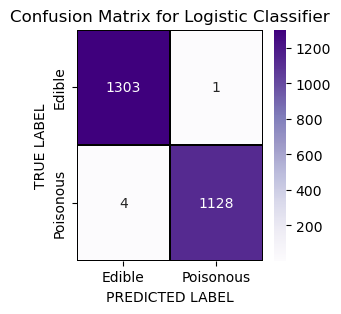

In [42]:
#Evaluation metric for classification
#To measure the performance(Model Accuracy) of the classification model we use the confusion matrix.
cm_lr = confusion_matrix(y_test,y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_lr, annot = True, fmt = ".0f",cmap="Purples", linewidths=0.2,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Classifier')
plt.show();

For this  binary classification, the matrix will be of a 2X2 table.

 1303 are the  counts having both predicted and actual values of edible mushrooms.(TP)
 
 1128 are the  counts having both predicted and actual values of Poisonous mushrooms.(TN)

*Misclassifications

 1  is the count of having prediction is Poisonous while actually, it is Edible mushrooms.(FP)
 
 4 is the count of having prediction is Edible while actually, it is Poisonous mushrooms.(FN)



In [43]:
#Classification Report 
print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1304
           1       1.00      1.00      1.00      1132

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of our trained classification model.

Since this values are 1, it tells us that the model does a very good job of predicting whether mushroom is edible or poisonous.

In [44]:
# Rather than predicting 1 and 0 we try to model the probabilities that the respose takes one of these twos  values
#now find out probability of predicted 0's and 1's
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted': lr.predict(X),
                        'p_0': [n[0] for n in lr.predict_proba(X)],        #using list comprehension
                        'p_1': [n[1] for n in lr.predict_proba(X)]})

In [45]:
y_pred_df

,actual,predicted,p_0,p_1
0,1,1,0.013628,0.986372
1,0,0,0.997453,0.002547
2,0,0,0.996617,0.003383
3,1,1,0.003320,0.996680
4,0,0,0.999984,0.000016
...,...,...,...,...
8119,0,0,0.983618,0.016382
8120,0,0,0.982907,0.017093
8121,0,0,0.993594,0.006406
8122,1,1,0.011278,0.988722


In [46]:
#Accuracy
print("ACC LR = ", accuracy_score(y_test, y_pred_lr))

ACC LR =  0.9979474548440066


auc accuracy: 0.997849779964881


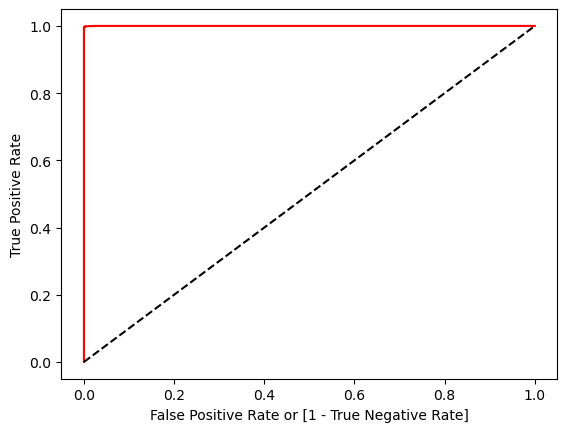

In [47]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])
auc = roc_auc_score(y_test, y_pred_lr)

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print('auc accuracy:',auc)

This plot shows a very good classifier, with the ROC curve closer to the axes and the “elbow” close to the coordinate (0,1).

-------------------------------------------------------------------------------------------------------

## DT

In [48]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

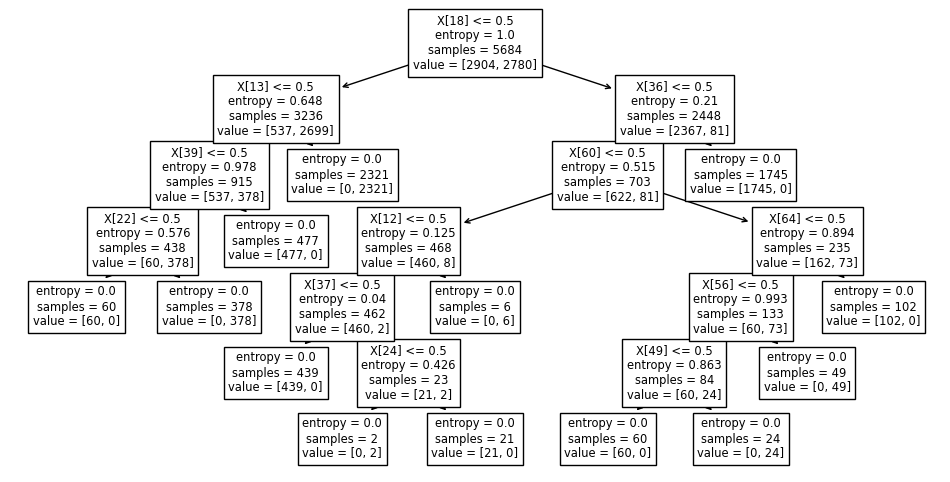

In [49]:
# Plotting Decision tree
plt.figure(figsize=(12,6))

tree.plot_tree(dt);
plt.show();

In [50]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 0, ..., 0, 0, 0])

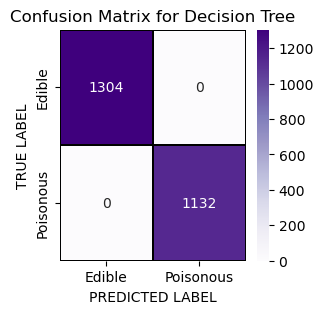

In [51]:
#Evaluation metric for classification

cm_dt = confusion_matrix(y_test,y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_dt, annot = True, fmt = ".0f",cmap="Purples", linewidths=0.2,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree')
plt.show();

Above matrix shows that thier is no misclassification.

In [52]:
#Classification Report 
print (classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1304
           1       1.00      1.00      1.00      1132

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



In [53]:
#Accuracy
print("ACC DT = ", accuracy_score(y_test, y_pred_dt))

ACC DT =  1.0


### Using by default value-gini

In [54]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [55]:
dt_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_gini.predict(X_test)
y_pred_dt_gini

array([1, 1, 0, ..., 0, 0, 0])

In [56]:
#Accuracy
print("ACC DT_gini = ", accuracy_score(y_test, y_pred_dt_gini))

ACC DT_gini =  1.0


As accuracy is 100%,Lets do Hyperparameter tunning by cutting the tree depth to overcome model overfitting problem.

In [57]:
#Hyper-parameter Tunning
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [58]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt1

array([1, 1, 0, ..., 0, 0, 0])

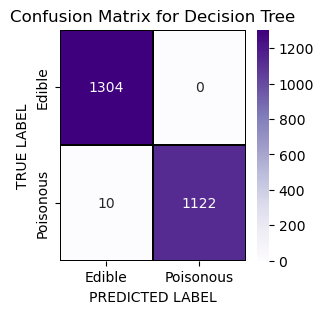

In [59]:
#Evaluation metric for classification

cm_dt1 = confusion_matrix(y_test,y_pred_dt1)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_dt1, annot = True, fmt = ".0f",cmap="Purples", linewidths=0.2,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree')
plt.show();

Now their are 10 missclassifications,so we overcone overfitting problem.

In [60]:
#Classification Report 
print (classification_report(y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1304
           1       1.00      0.99      1.00      1132

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



In [61]:
#Accuracy
print("ACC DT1 = ", accuracy_score(y_test, y_pred_dt1))

ACC DT1 =  0.9958949096880131


-------------------------------------------------------------------------------------------------------

## Random forest

### Random Forest Classification using kfold

In [62]:
kfold=KFold(n_splits=5,random_state=72,shuffle=True)

In [97]:
rf = RandomForestClassifier(n_estimators=50, max_features=4,random_state=32)
results_rf = cross_val_score(rf, X, y, cv=kfold)

In [98]:
# Accuracy
print(results_rf.mean())

1.0


--------------------------------------

## Bagging

### Bagging with default D.T classifier Using train test split

In [65]:
bag_c=BaggingClassifier()

In [66]:
bag_m=bag_c.fit(X_train,y_train)

In [67]:
#Accuray
bag_m.score(X_test,y_test)

1.0

### Bagging with default D.T classifier use kfold split

In [68]:
model3 = BaggingClassifier(n_estimators=50, random_state=7)
result1 = cross_val_score(model3, X, y, cv=kfold)

In [69]:
#Accuracy
print(result1.mean())

1.0


### Bagging with Logistic classification

In [70]:
cart=LogisticRegression(max_iter=500)
model4 = BaggingClassifier(base_estimator=cart, n_estimators=50, random_state=7)
result2 = cross_val_score(model4, X, y, cv=kfold)

In [71]:
#Accuracy
print(result2.mean())

0.9976600985221674


-------------------------------------

## AdaBoost Classification

In [72]:
ab = AdaBoostClassifier(n_estimators=60, random_state=8)          #bydefault estimator=DT
result_ab = cross_val_score(ab, X, y, cv=kfold)

In [73]:
#Accuracy
print(result_ab.mean())

1.0


----------------------------

## Voting Classifier

In [74]:
# create the sub models
estimators = []

model6 = LogisticRegression(max_iter=1000)    #LogisticRegression
estimators.append(('logistic', model6))

model7 = DecisionTreeClassifier()    #DecisionTreeClassifier
estimators.append(('cart1', model7))

model8 = SVC()        #support vector classifier
estimators.append(('svm', model8))

# create the ensemble model
ensemble = VotingClassifier(estimators)
result_vc = cross_val_score(ensemble, X, y, cv=kfold)
print(result_vc.mean())

1.0


--------------------

## XGBboost

In [111]:
# fit model no training data
xgb = XGBClassifier(n_estimators=10, gamma=.6,learning_rate=0.3,random_state=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

In [112]:
# make predictions for test data
y_pred_xgb = xgb.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]
predictions

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [113]:
#Accuracy
print("ACC XGB = ", accuracy_score(y_test, predictions))

ACC XGB =  0.9991789819376026


----------------------------

## SVC(support vector classifier) / soft margin classifier

In [78]:
#SVM Clasification
svm = SVC(C=1, kernel='linear')         #bydefault kernel=rbf      C=to control soft margin
svm1=svm.fit(X_train,y_train)
result_svm = svm1.score(X_test,y_test)

In [79]:
#Accuracy
print(np.round(result_svm, 4))

0.9992


-----------------------------------------------------------

## KNN

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [81]:
#Accuracy
print("ACC KNN =", accuracy_score(y_test, y_pred_knn))

ACC KNN = 0.9991789819376026


----------------------------------------

##  Naive Bayes

In [82]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1304
           1       0.99      0.97      0.98      1132

    accuracy                           0.98      2436
   macro avg       0.98      0.98      0.98      2436
weighted avg       0.98      0.98      0.98      2436



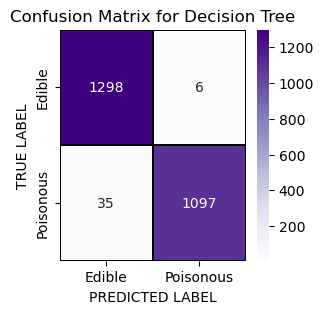

In [84]:
#Evaluation metric for classification

cm_dt2 = confusion_matrix(y_test,y_pred_gnb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_dt2, annot = True, fmt = ".0f",cmap="Purples", linewidths=0.2,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree')
plt.show();

In [85]:
print("ACC gnb =", accuracy_score(y_test, y_pred_gnb))

ACC gnb = 0.9831691297208539


---------------------------------------

In [86]:
# Combining all Modesl accuracies and forming Dataframe
final_data_acc = pd.DataFrame({'Models':['LogisticReg','DecisionTree','RandomForest','Bagging','AdaBoost','VotingClassifier','XgBoost','SVM','KNN','NaiveBayes'],
                          'Accuracy': [accuracy_score(y_test, y_pred_lr)*100,
                                 accuracy_score(y_test, y_pred_dt1)*100,
                                 results_rf.mean()*100,
                                 bag_m.score(X_test,y_test)*100,
                                 result_ab.mean()*100,
                                 result_vc.mean()*100,
                                 accuracy_score(y_test, predictions)*100,
                                 np.round(result_svm, 4)*100,
                                 accuracy_score(y_test, y_pred_knn)*100,
                                 accuracy_score(y_test, y_pred_gnb)*100]})
final_data_acc

,Models,Accuracy
0,LogisticReg,99.794745
1,DecisionTree,99.589491
2,RandomForest,100.000000
3,Bagging,100.000000
4,AdaBoost,100.000000
5,VotingClassifier,100.000000
6,XgBoost,99.917898
7,SVM,99.920000
8,KNN,99.917898
9,NaiveBayes,98.316913


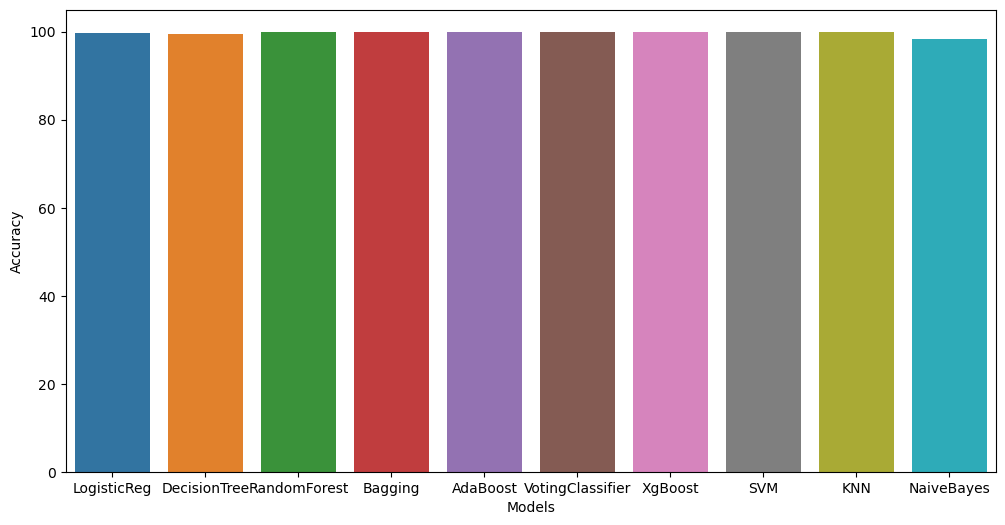

In [87]:
#Visualization
plt.figure(figsize=(12,6))
sns.barplot(final_data_acc['Models'], final_data_acc['Accuracy'])
plt.show()

Most of the classification methods hit 100% accuracy. but due to ovefitting problem we select second best model for deploying that is 'Support Vector Machine' which allows some Missclassifications.

-------------------------

# Saving Model

In [88]:
!pip install pickle-mixin

In [89]:
filename = 'final_svm_model.pkl'
pickle.dump(svm, open(filename,'wb'))

In [90]:
pickled_model=pickle.load(open('final_svm_model.pkl','rb'))

In [91]:
pickled_model.fit(X_train,y_train)
pk=pickled_model.predict(X_test)
pk

array([1, 1, 0, ..., 0, 0, 0])